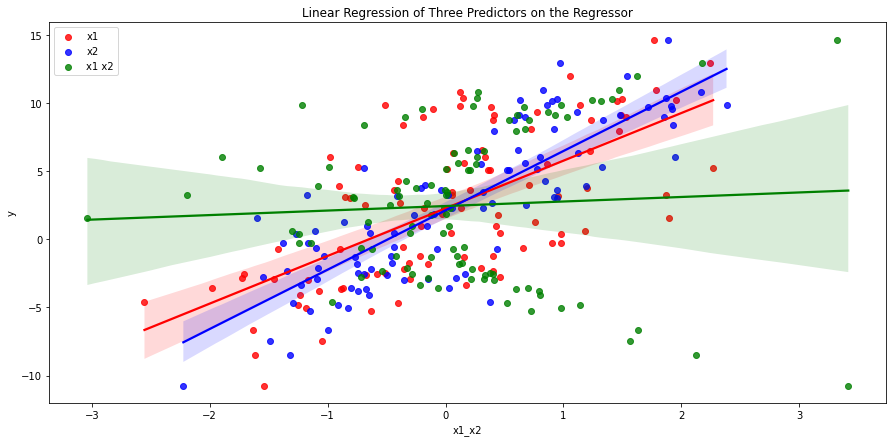

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='x1', y='y', data=df, ax=ax, color='red', label='x1')
sns.regplot(x='x2', y='y', data=df, ax=ax, color='blue', label='x2')
sns.regplot(x='x1_x2', y='y', data=df, ax=ax, color='green', label='x1 x2')

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

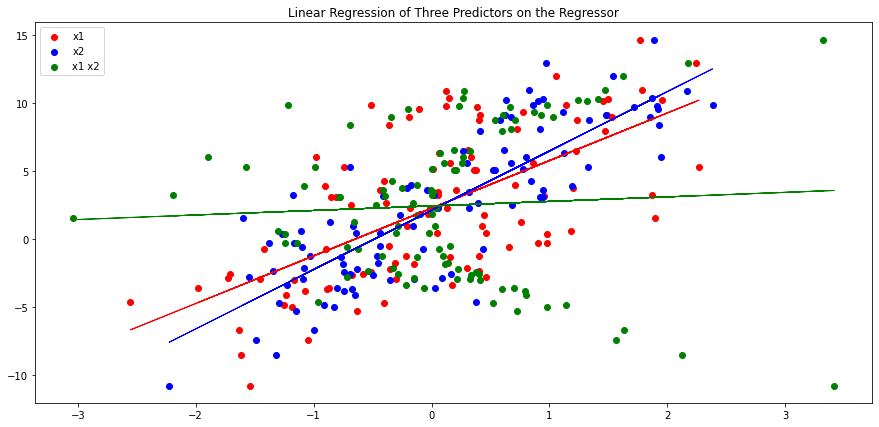

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))

# regression 1: x1 on y
x1 = sm.add_constant(df['x1'])
model = sm.OLS(df['y'], x1).fit()
pred = model.predict(x1)
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth=1)

# regression 2: x2 on y
x2 = sm.add_constant(df['x2'])
model = sm.OLS(df['y'], x2).fit()
pred = model.predict(x2)
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth=1)

# regression 3: x1_x2 on y
x1_x2 = sm.add_constant(df['x1_x2'])
model = sm.OLS(df['y'], x1_x2).fit()
pred = model.predict(x1_x2)
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth=1)

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

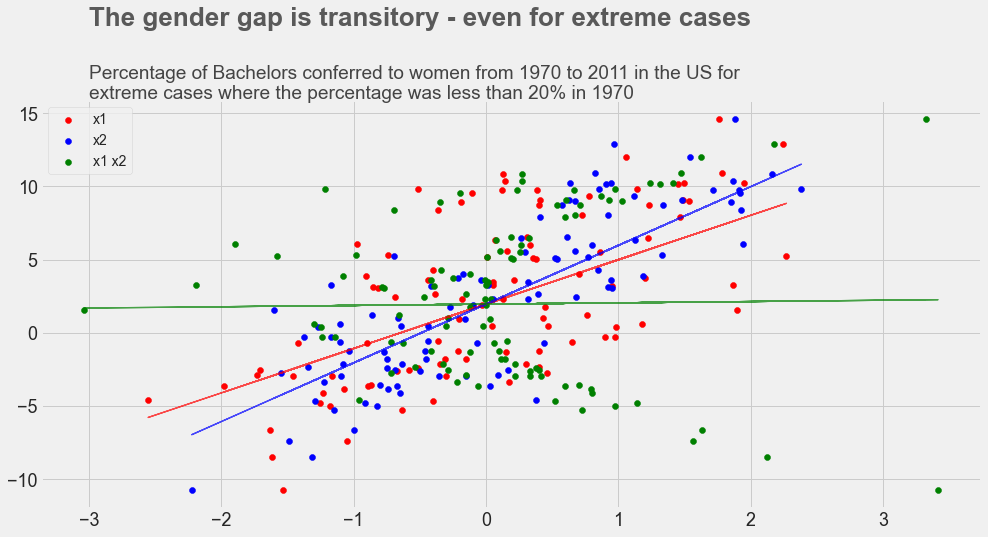

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the multivariate regression
x = sm.add_constant(df[['x1', 'x2', 'x1_x2']])
model = sm.OLS(df['y'], x).fit()

# plot the three relationships
fig, ax = plt.subplots(figsize=(15, 7))

# relationship 1: x1 on y
pred = model.params[0] + model.params[1] * df['x1']
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth = 1.3, alpha = .7)

# relationship 2: x2 on y
pred = model.params[0] + model.params[2] * df['x2']
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth = 1.3, alpha = .7)

# relationship 3: x1_x2 on y
pred = model.params[0] + model.params[3] * df['x1_x2']
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth = 1.3, alpha = .7)

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 21, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = 16,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'random_forest',
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
    }
])

def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'xgboost',
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.1, 1),
        'gamma': hp.uniform('gamma', 0, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
        'reg_lambda': hp.uniform('reg_lambda', 0, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0, 1)
    }
])

def objective(params):
    model = xgb.XGBRegressor(
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        reg_lambda=params['reg_lambda'],
        reg_alpha=params['reg_alpha'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, verbose=1)

In [ ]:
# Perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Degrees of freedom
dof = len(sample1) + len(sample2) - 2

# Calculate standard error
se = np.sqrt(np.var(sample1) / len(sample1) + np.var(sample2) / len(sample2))

# Calculate t critical value
t_critical = t.ppf(0.95, dof)

# Calculate confidence interval
margin_of_error = t_critical * se
confidence_interval = (np.mean(sample1) - np.mean(sample2) - margin_of_error, np.mean(sample1) - np.mean(sample2) + margin_of_error)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Confidence Interval:", confidence_interval)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'depth': hp.choice('depth', [3, 4, 5, 6, 7, 8]),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'iterations': hp.quniform('iterations', 50, 500, 50),
    'random_strength': hp.loguniform('random_strength', -5, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 96, 128, 160]),
    'cat_features': hp.choice('cat_features', [[3, 5, 8], [2, 6, 9], [1, 4, 7]])
}

# Define objective function for hyperparameter tuning
def objective(params):
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Print best hyperparameters
print("Best Hyperparameters:", best)


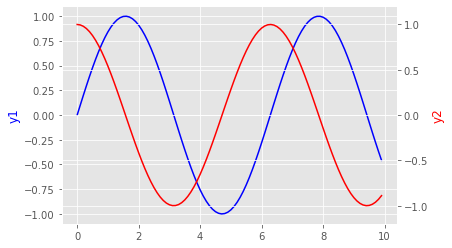

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# generate some random data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# create the first set of axes
fig, ax1 = plt.subplots()

# plot the first line on the first set of axes
ax1.plot(x, y1, color='blue')

# set the y-axis label for the first set of axes
ax1.set_ylabel('y1', color='blue')

# create the second set of axes
ax2 = ax1.twinx()

# plot the second line on the second set of axes
ax2.plot(x, y2, color='red')

# set the y-axis label for the second set of axes
ax2.set_ylabel('y2', color='red')

# set the y-axis limit for the second set of axes
ax2.set_ylim([-1.2, 1.2])

# display the plot
plt.show()

## A/B T Test

PSE = SQRT(((Group1_CR*(1-Group1_CR))/Group1_Users)+((Group2_CR*(1-Group2_CR))/Group2_Users))

TS = ABS(Group2_CR - Group1_CR) / PSE

P_value = 2*(1-NORM.S.DIST(TS,TRUE))

## A/B Two Porportional Z Test

Pooled_Prop = (Group1_Conversions + Group2_Conversions) / (Group1_Visitors + Group2_Visitors)

Pooled_Var = Pooled_Prop * (1 - Pooled_Prop) * (1/Group1_Visitors + 1/Group2_Visitors)

Std_Error = SQRT(Pooled_Var)

Test_Stat = (Group2_Conversions / Group2_Visitors - Group1_Conversions / Group1_Visitors) / Std_Error

P_Value = 2 * (1 - NORM.S.DIST(ABS(Test_Stat), TRUE))


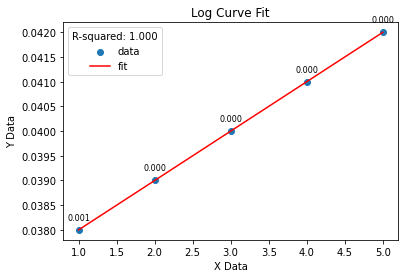

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the log curve model
def log_curve(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

# Generate some example data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([.038, .039, .04, .041, .042])

# Fit the model to the data
popt, pcov = curve_fit(log_curve, x_data, y_data)

# Calculate the predicted values
y_pred = log_curve(x_data, *popt)

# Calculate the R-squared value
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate the slope of each point
slopes = []
for i in range(len(x_data)):
    if i == 0:
        slope = (y_data[1] - y_data[0]) / (x_data[1] - x_data[0])
    elif i == len(x_data) - 1:
        slope = (y_data[-1] - y_data[-2]) / (x_data[-1] - x_data[-2])
    else:
        slope = (y_data[i+1] - y_data[i-1]) / (x_data[i+1] - x_data[i-1])
    slopes.append(slope)

# Calculate the difference in slope between each point
slope_diffs = []
for i in range(len(slopes)):
    if i == 0:
        slope_diff = slopes[i]
    else:
        slope_diff = slopes[i] - slopes[i-1]
    slope_diffs.append(slope_diff)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data points and the fitted curve
ax.scatter(x_data, y_data, label='data')
ax.plot(x_data, y_pred, 'r-', label='fit')

# Set axis labels and title
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_title('Log Curve Fit')

# Show R-squared value in the legend
ax.legend(title=f'R-squared: {r_squared:.3f}')

# Add slope difference above each point
for i in range(len(x_data)):
    ax.annotate(f'{slope_diffs[i]:.3f}', xy=(x_data[i], y_data[i]), xytext=(0,10), textcoords='offset points', ha='center', fontsize=8)

# Display the plot
plt.show()
